In [64]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from cdt.metrics import SID

Detecting 1 CUDA device(s).


# Import Data

In [73]:
current_directory = os.getcwd()

result_path = 'results'

result_path = os.path.join(current_directory, result_path)

In [79]:
files = glob.glob(os.path.join(result_path, 'RKHS_function_type_gp_d10_seed*'))

SHD_results = []
F1_results = []
for filename in files:
    print("filename: ", filename)
    with open(filename, 'r') as file:
        data = json.load(file)
        SHD = data['SHD']
        SHD_results.append(SHD)
        F1 = data['F1']
        F1_results.append(F1)
        B_true = np.array(data['B_true'])
        W_est = np.array(data['W_est_no_thresh'])
    filename_current = filename.replace('RKHS', 'NOTEARS_MLP')
    #filename_current = "c:\Users\yurou\Desktop\Master thesis\Non-parametric-Learning-of-DAG-by-NOTEARS_MLP\Final\experiments\results\NOTEARS_MLP_function_type_gp_d10_seed0"
    print("filename_current: ", filename_current)
    with open(filename_current, 'r') as file:
        data = json.load(file)
        W_est = np.array(data['W_est'])
        sid = SID(B_true, W_est != 0).item()
        print("sid: ", sid)
# plt.boxplot(SHD_results)
# plt.title('gp')
# plt.ylabel('SHD')
# plt.show()

filename:  c:\Users\yurou\Desktop\Master thesis\Non-parametric-Learning-of-DAG-by-RKHS\Final\experiments\results\RKHS_function_type_gp_d10_seed0
filename_current:  c:\Users\yurou\Desktop\Master thesis\Non-parametric-Learning-of-DAG-by-NOTEARS_MLP\Final\experiments\results\NOTEARS_MLP_function_type_gp_d10_seed0


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\yurou\\Desktop\\Master thesis\\Non-parametric-Learning-of-DAG-by-NOTEARS_MLP\\Final\\experiments\\results\\NOTEARS_MLP_function_type_gp_d10_seed0'

In [81]:
filename_current = r"c:\Users\yurou\Desktop\Master thesis\Non-parametric-Learning-of-DAG-by-RKHS\Final\experiments\results\NOTEARS_MLP_function_type_gp_d10_seed0"
with open(filename_current, 'r') as file:
    data = json.load(file)
    W_est = np.array(data['W_est'])

In [82]:
filename_current = r"c:\Users\yurou\Desktop\Master thesis\Non-parametric-Learning-of-DAG-by-NOTEARS_MLP\Final\experiments\results\NOTEARS_MLP_function_type_gp_d10_seed0"
with open(filename_current, 'r') as file:
    data = json.load(file)
    W_est = np.array(data['W_est'])

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\yurou\\Desktop\\Master thesis\\Non-parametric-Learning-of-DAG-by-NOTEARS_MLP\\Final\\experiments\\results\\NOTEARS_MLP_function_type_gp_d10_seed0'

In [25]:
def analyse(function_type, measure):
    result_matrix = []
    d_values = [10, 20, 30, 40]
    for d in d_values:
        files = glob.glob(os.path.join(RKHS_path, f'RKHS_function_type_{function_type}_d{d}_seed*'))
        results = []
        for filename in files:
            with open(filename, 'r') as file:
                data = json.load(file)
                measure_value = data[f'{measure}']
                results.append(measure_value)
        result_matrix.append(results)
    plt.boxplot(result_matrix, labels=d_values)
    plt.title(f'{function_type}')
    plt.ylabel(f'{measure}')
    plt.show()

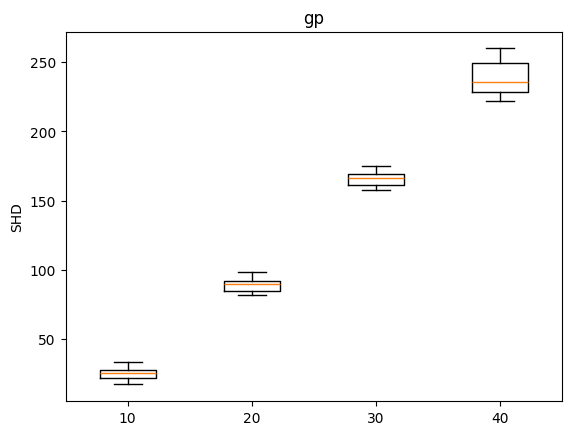

In [26]:
analyse('gp', 'SHD')

In [55]:
def analyse(function_type, measure):
    d_values = [10, 20, 30, 40]
    all_data = pd.DataFrame()
    for method in ['RKHS', 'NOTEARS_MLP', 'NOTEARS_SOB']:
        for d in d_values:
            files = glob.glob(os.path.join(result_path, f'{method}_function_type_{function_type}_d{d}_seed*'))
            results = []
            for filename in files:
                with open(filename, 'r') as file:
                    data = json.load(file)
                    measure_value = data[f'{measure}']
                    results.append(measure_value)

            temp_df = pd.DataFrame({
                'd': [d] * len(results),
                'Results': results,
                'Method': [method] * len(results)
            })

            all_data = pd.concat([all_data, temp_df], ignore_index=True)
    sns.boxplot(x='d', y='Results', hue='Method', data=all_data, palette='Set1')
    plt.title(f'{function_type}')
    plt.xlabel('d value')
    plt.ylabel(f'{measure}')
    plt.show()

# F1

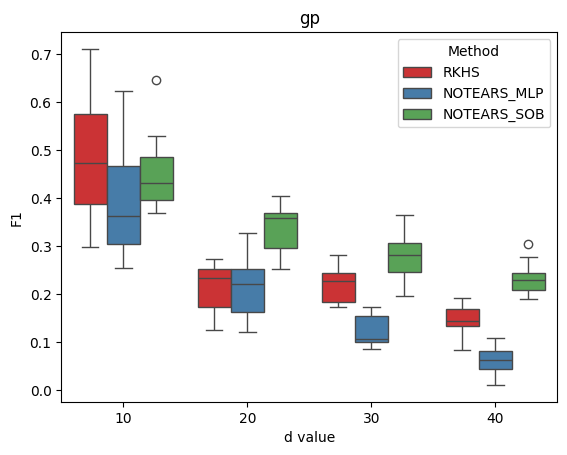

In [57]:
analyse('gp', 'F1')

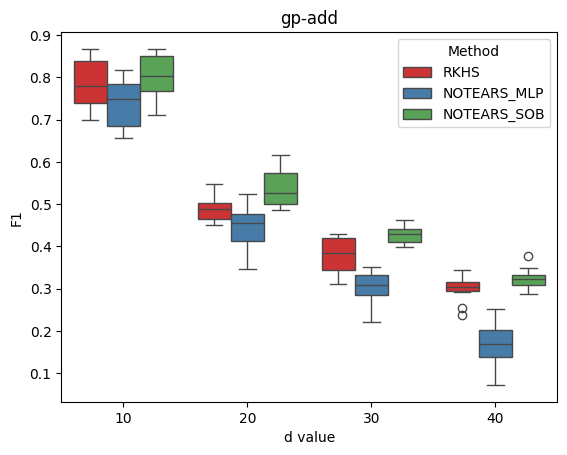

In [58]:
analyse('gp-add', 'F1')

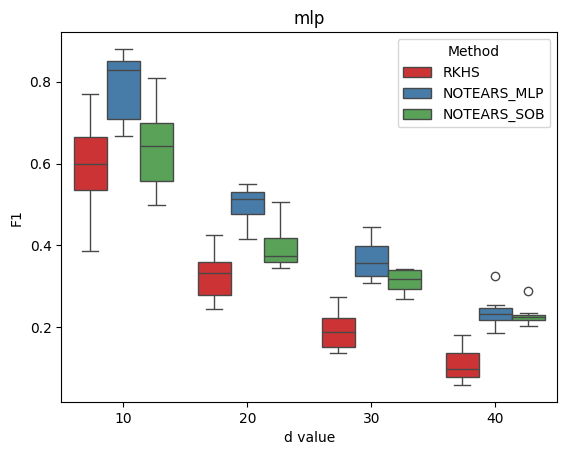

In [59]:
analyse('mlp', 'F1')

# SHD

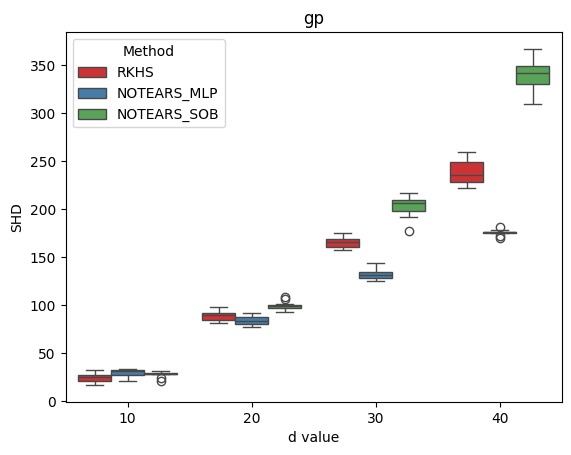

In [61]:
analyse('gp', 'SHD')

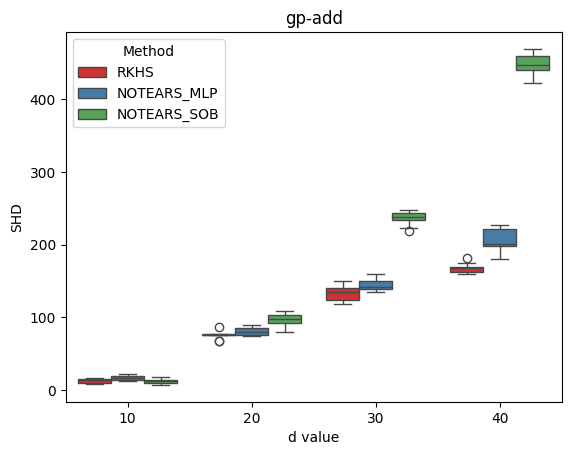

In [62]:
analyse('gp-add', 'SHD')

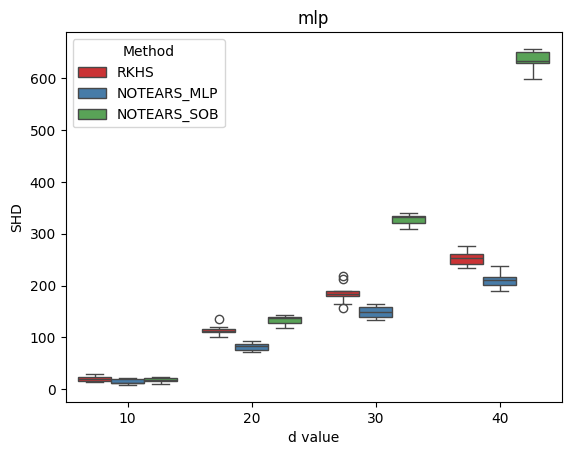

In [63]:
analyse('mlp', 'SHD')